In [ ]:
import pandas as pd

data = {
    "y":  [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4],
    "x1": [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10],
    "x2": [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68],
    "x3": [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8],
    "x4": [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12]
}

df = pd.DataFrame(data)
print(df)


        y  x1  x2  x3  x4
0    78.5   7  26   6  60
1    74.3   1  29  15  52
2   104.3  11  56   8  20
3    87.6  11  31   8  47
4    95.9   7  52   6  33
5   109.2  11  55   9  22
6   102.7   3  71  17   6
7    72.5   1  31  22  44
8    93.1   2  54  18  22
9   115.9  21  47   4  26
10   83.8   1  40  23  34
11  113.3  11  66   9  12
12  109.4  10  68   8  12


In [ ]:
# Crear una copia independiente
df_2 = df.copy()

# Reemplazar toda la columna 'y' con 1 en la copia
df_2['y'] = 1
print("\nDataFrame modificado (df_2):\n", df_2)


DataFrame modificado (df_2):
     y  x1  x2  x3  x4
0   1   7  26   6  60
1   1   1  29  15  52
2   1  11  56   8  20
3   1  11  31   8  47
4   1   7  52   6  33
5   1  11  55   9  22
6   1   3  71  17   6
7   1   1  31  22  44
8   1   2  54  18  22
9   1  21  47   4  26
10  1   1  40  23  34
11  1  11  66   9  12
12  1  10  68   8  12


In [ ]:
# ──────────────────────────────────────────────────────────────────────────────
# BLOQUE: TRASPUESTA DE UNA MATRIZ
# Objetivo: obtener la traspuesta de la matriz X que usamos en regresión.
# ──────────────────────────────────────────────────────────────────────────────
# Explicación "para la abuela":
# - Una matriz es como una tabla: tiene filas (acostadas) y columnas (de pie).
# - La TRASPUESTA es cuando damos vuelta la tabla:
#       - Lo que antes eran filas, ahora se convierten en columnas.
#       - Lo que antes eran columnas, ahora se convierten en filas.
# - Ejemplo: si X tiene forma (13 filas, 5 columnas),
#   su traspuesta tendrá forma (5 filas, 13 columnas).
# - En Numpy se usa .T para hacer la traspuesta.
# ──────────────────────────────────────────────────────────────────────────────

# Sacar la traspuesta de X
Xt = X.T
print("X traspuesta:\n", Xt)

X traspuesta:
 [[ 7  1 11 11  7 11  3  1  2 21  1 11 10]
 [26 29 56 31 52 55 71 31 54 47 40 66 68]
 [ 6 15  8  8  6  9 17 22 18  4 23  9  8]
 [60 52 20 47 33 22  6 44 22 26 34 12 12]]


In [ ]:
# Tomar la columna 'y' original
df_y = df['y']     # esto conserva los valores originales
print(df_y)


0      78.5
1      74.3
2     104.3
3      87.6
4      95.9
5     109.2
6     102.7
7      72.5
8      93.1
9     115.9
10     83.8
11    113.3
12    109.4
Name: y, dtype: float64


In [ ]:
import numpy as np

# Calcular X^T * X con @
XtX = Xt @ X

print("Matriz X^T * X:\n", XtX)

Matriz X^T * X:
 [[ 1139  4922   769  2620]
 [ 4922 33050  7201 15739]
 [  769  7201  2293  4628]
 [ 2620 15739  4628 15062]]


In [ ]:
# Inversa de X'X
XtX_inv = np.linalg.inv(XtX)
print("\nMatriz (X'X)^-1:\n", XtX_inv)


Matriz (X'X)^-1:
 [[ 0.00587238 -0.00131617  0.00381672 -0.00081889]
 [-0.00131617  0.00039321 -0.00112211  0.00016285]
 [ 0.00381672 -0.00112211  0.00435288 -0.00082884]
 [-0.00081889  0.00016285 -0.00082884  0.00029334]]


In [ ]:
# Beta (SIN intercepto), tal cual tu flujo
beta = XtX_inv @ (Xt @ y)
print("\nBeta (sin intercepto):\n", beta.ravel())


Beta (sin intercepto):
 [2.19304602 1.15332597 0.75850914 0.48631933]


#Calculo de Errores

In [ ]:
df["ypred"] = X @ beta
df

,y,x1,x2,x3,x4,ypred
0,78.5,7,26,6,60,79.068012
1,74.3,1,29,15,52,72.305741
2,104.3,11,56,8,20,104.504220
3,87.6,11,31,8,47,88.801693
4,95.9,7,52,6,33,95.923865
5,109.2,11,55,9,22,105.082042
6,102.7,3,71,17,6,104.277853
7,72.5,1,31,22,44,76.031403
8,93.1,2,54,18,22,91.017884
9,115.9,21,47,4,26,115.938626


In [ ]:
# error = y - ypred
df["y-ypred"] =  df["y"] - df["ypred"]
df

,y,x1,x2,x3,x4,ypred,y-ypred
0,78.5,7,26,6,60,79.068012,-0.568012
1,74.3,1,29,15,52,72.305741,1.994259
2,104.3,11,56,8,20,104.504220,-0.204220
3,87.6,11,31,8,47,88.801693,-1.201693
4,95.9,7,52,6,33,95.923865,-0.023865
5,109.2,11,55,9,22,105.082042,4.117958
6,102.7,3,71,17,6,104.277853,-1.577853
7,72.5,1,31,22,44,76.031403,-3.531403
8,93.1,2,54,18,22,91.017884,2.082116
9,115.9,21,47,4,26,115.938626,-0.038626


In [ ]:
# error = y - ypred
df["error^2"] = df["y-ypred"]**2
df

,y,x1,x2,x3,x4,ypred,y-ypred,error^2
0,78.5,7,26,6,60,79.068012,-0.568012,0.322637
1,74.3,1,29,15,52,72.305741,1.994259,3.977068
2,104.3,11,56,8,20,104.504220,-0.204220,0.041706
3,87.6,11,31,8,47,88.801693,-1.201693,1.444065
4,95.9,7,52,6,33,95.923865,-0.023865,0.000570
5,109.2,11,55,9,22,105.082042,4.117958,16.957578
6,102.7,3,71,17,6,104.277853,-1.577853,2.489621
7,72.5,1,31,22,44,76.031403,-3.531403,12.470804
8,93.1,2,54,18,22,91.017884,2.082116,4.335206
9,115.9,21,47,4,26,115.938626,-0.038626,0.001492


In [ ]:
error_cuad_total = df["error^2"].sum()
error_cuad_total

np.float64(52.609156206768986)

In [ ]:
# MSE = error_cuad_medio
mse = error_cuad_total / len(df)
mse

np.float64(4.04685816975146)

In [ ]:
rmse = mse**(1/2)
rmse

np.float64(2.011680434301497)

#Histograma de Errores

<Axes: >

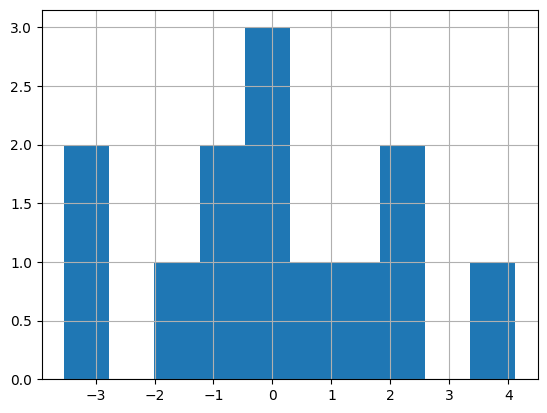

In [ ]:
df["y-ypred"].hist()

In [ ]:
# Calcular el error absoluto
df["error_abs"] = abs(df["y-ypred"])
print("DataFrame con error absoluto:\n", df)

# Calcular el error absoluto total
error_abs_total = df["error_abs"].sum()
print("\nError absoluto total:", error_abs_total)

# Calcular el MAE (Error Absoluto Medio)
mae = error_abs_total / len(df)
print("\nMAE (Error Absoluto Medio):", mae)

DataFrame con error absoluto:
         y  x1  x2  x3  x4       ypred   y-ypred    error^2  error_abs
0    78.5   7  26   6  60   79.068012 -0.568012   0.322637   0.568012
1    74.3   1  29  15  52   72.305741  1.994259   3.977068   1.994259
2   104.3  11  56   8  20  104.504220 -0.204220   0.041706   0.204220
3    87.6  11  31   8  47   88.801693 -1.201693   1.444065   1.201693
4    95.9   7  52   6  33   95.923865 -0.023865   0.000570   0.023865
5   109.2  11  55   9  22  105.082042  4.117958  16.957578   4.117958
6   102.7   3  71  17   6  104.277853 -1.577853   2.489621   1.577853
7    72.5   1  31  22  44   76.031403 -3.531403  12.470804   3.531403
8    93.1   2  54  18  22   91.017884  2.082116   4.335206   2.082116
9   115.9  21  47   4  26  115.938626 -0.038626   0.001492   0.038626
10   83.8   1  40  23  34   82.306652  1.493348   2.230088   1.493348
11  113.3  11  66   9  12  112.905434  0.394566   0.155682   0.394566
12  109.4  10  68   8  12  112.260531 -2.860531   8.182638 

In [ ]:
# Calcular el error absoluto porcentual
# Evitar división por cero si hay valores de y iguales a cero
df["error_abs_perc"] = (df["error_abs"] / abs(df["y"])) * 100
print("DataFrame con error absoluto porcentual:\n", df)

# Calcular el MAPE (Error Absoluto Porcentual Medio)
mape = df["error_abs_perc"].mean()
print("\nMAPE (Error Absoluto Porcentual Medio):", mape)

DataFrame con error absoluto porcentual:
         y  x1  x2  x3  x4       ypred   y-ypred    error^2  error_abs  \
0    78.5   7  26   6  60   79.068012 -0.568012   0.322637   0.568012   
1    74.3   1  29  15  52   72.305741  1.994259   3.977068   1.994259   
2   104.3  11  56   8  20  104.504220 -0.204220   0.041706   0.204220   
3    87.6  11  31   8  47   88.801693 -1.201693   1.444065   1.201693   
4    95.9   7  52   6  33   95.923865 -0.023865   0.000570   0.023865   
5   109.2  11  55   9  22  105.082042  4.117958  16.957578   4.117958   
6   102.7   3  71  17   6  104.277853 -1.577853   2.489621   1.577853   
7    72.5   1  31  22  44   76.031403 -3.531403  12.470804   3.531403   
8    93.1   2  54  18  22   91.017884  2.082116   4.335206   2.082116   
9   115.9  21  47   4  26  115.938626 -0.038626   0.001492   0.038626   
10   83.8   1  40  23  34   82.306652  1.493348   2.230088   1.493348   
11  113.3  11  66   9  12  112.905434  0.394566   0.155682   0.394566   
12  109.4

In [ ]:
# Calcular la media de la variable dependiente (y)
y_mean = df["y"].mean()

# Calcular la suma total de cuadrados (SST)
# SST = sum((y - y_mean)^2)
df["y_minus_ymean_sq"] = (df["y"] - y_mean)**2
sst = df["y_minus_ymean_sq"].sum()
print("Suma total de cuadrados (SST):", sst)

# El error cuadrático total (SSR) ya lo tenemos calculado como error_cuad_total
ssr = error_cuad_total
print("Suma de cuadrados residuales (SSR):", ssr)

# Calcular R2
r2 = 1 - (ssr / sst)
print("\nR2:", r2)

Suma total de cuadrados (SST): 2715.7630769230777
Suma de cuadrados residuales (SSR): 52.609156206768986

R2: 0.9806282231856638
